Задача №3.
Для заданного набора данных произведите масштабирование данных (для одного признака) и преобразование категориальных признаков в количественные двумя способами (label encoding, one hot encoding) для одного признака. Какие методы Вы использовали для решения задачи и почему?

Датасет:
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")
# Загружаю датасет
from sklearn.datasets import load_wine
data_raw = load_wine()
# Преобразую данные для дальнейшей работы
data = pd.DataFrame(data_raw.data, columns=data_raw.feature_names)
# Провожу базовые исследования датасета, чтобы лучше понять, с чем работаю
#data.shape
#data.dtypes
#data.isnull().sum()
data.head(10)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0


Проведём масштабирование параметра 'alcohol'

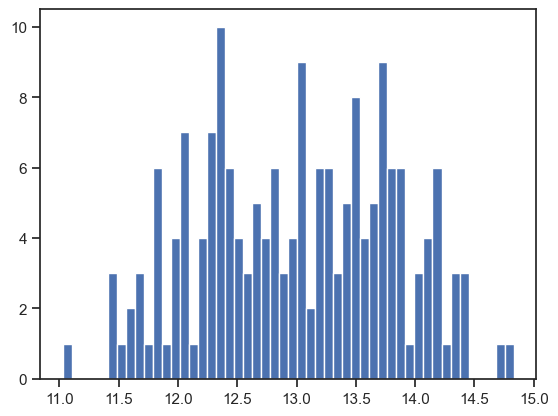

In [2]:
from sklearn.preprocessing import MinMaxScaler
# Сначала посмотрим, как сработает МинМакс масштабирование
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['alcohol']])
plt.hist(data['alcohol'], 50)
plt.show()

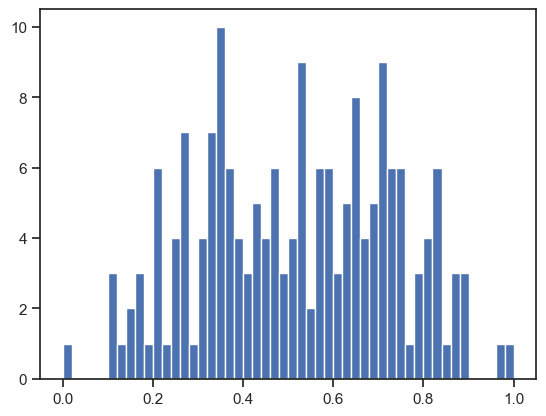

In [3]:
plt.hist(scaled_data, 50) 
plt.show()
# Теперь данные расположены от 0 до 1

Для решения задачи я использовал MinMax масштабирование, т.к. мне показалось, что расположить содержание алкоголя в вине в спектре от 0 (минимальное зафиксированое содержание) до 1 (максимальное зафиксирование содержание) - это более интуитивно, чём масштабирование на основе Z-опции, которое расположило бы данные в промежутке от -3 до 3.

Теперь произведём преобразование категоральных признаков в количественные двумя способами - label encoding и one hot encoding для признака. Поскольку в данном датасете нет категоральных признаков, я сперва положу, что столбец 'hue' является категоральным, после чего я дополнительно рассмотрю датасет books.csv из второй лабораторной работы. 

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_wine
data_raw = load_wine()
data = pd.DataFrame(data_raw.data, columns=data_raw.feature_names)
le = LabelEncoder()
data_le = le.fit_transform(data['hue'])
#le.classes_
np.unique(data_le)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77], dtype=int64)

Каждому уникальному параметру теперь соответствует собственный идентификатор.

In [5]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
data_ohe = ohe.fit_transform(data[['hue']])
data_ohe.todense()[0:5]

matrix([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

Для каждого уникального параметра создан новый столбец.

Теперь рассмотрим датасет с реальными категоральными признаками, в данном случае - язык.

In [6]:
data2 = pd.read_csv('./lab2/books.csv', sep=",")
data2_le = le.fit_transform(data2['language_code'])
np.unique(data2_le)

array([0, 1, 2, 3, 4, 5, 6, 7])

In [7]:
data2_ohe = ohe.fit_transform(data2[['language_code']])
data2_ohe.todense()[0:12]

matrix([[0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0.]])

Выбор способа преобразования зависит от того, каким методом мы в дальнейшем собираемся обучать систему.

Дополнительное задание - Для студентов группы РТ5-61Б - для пары произвольных колонок данных построить график "Jointplot".

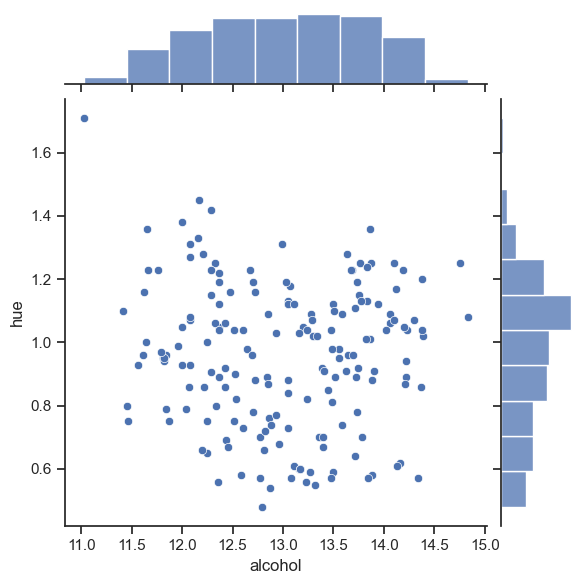

In [8]:
sns.jointplot(x='alcohol', y='hue', data=data)